In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from anomalydetector_evt.DSPOT import DSPOT

In [2]:
## Generar datos con drift
tiempo = np.arange(1, 5000) 
pendiente = 2.5  # Cambio lineal 
constante = 10  # Término constante

datos = pendiente * tiempo + constante

# Agregar ruido aleatorio
np.random.seed(123)
ruido = np.random.normal(300, 300, tiempo.shape)
datos += ruido

# Índices para generar anomalías
idx = np.random.randint(500, 5000, 20)
# Ponderación para aumento
incremento = np.random.uniform(0.2, 1, 20)
# Agregar anomalías
datos[idx] = datos[idx] * (1 + incremento)

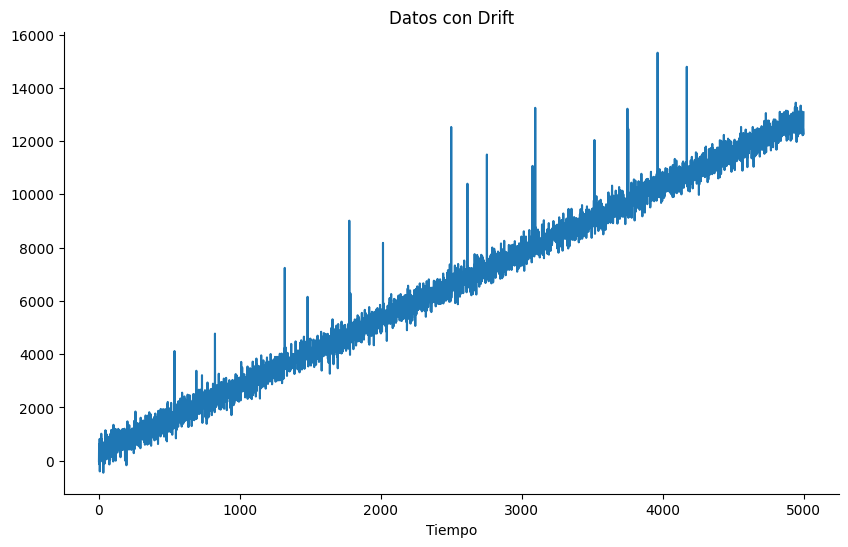

In [3]:
# Crear un gráfico de los datos
plt.figure(figsize=(10, 6))

plt.plot(tiempo, datos)
plt.xlabel('Tiempo')
plt.title('Datos con Drift')

# Obtener los ejes actuales
ax = plt.gca()

# Ocultar las espinas (bordes) del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrar el gráfico
plt.show()

Probar la eliminación del Drift

In [4]:
n_init = round(len(datos) * 0.1) # 10% para entrenamiento
data_init = datos[:n_init]

# Creamos la clase para detectar anomalías
anomalydetector = DSPOT(data_init, p=0.98, q=10e-4, d=12)

# Iniciamos (POT)
anomalydetector.init()

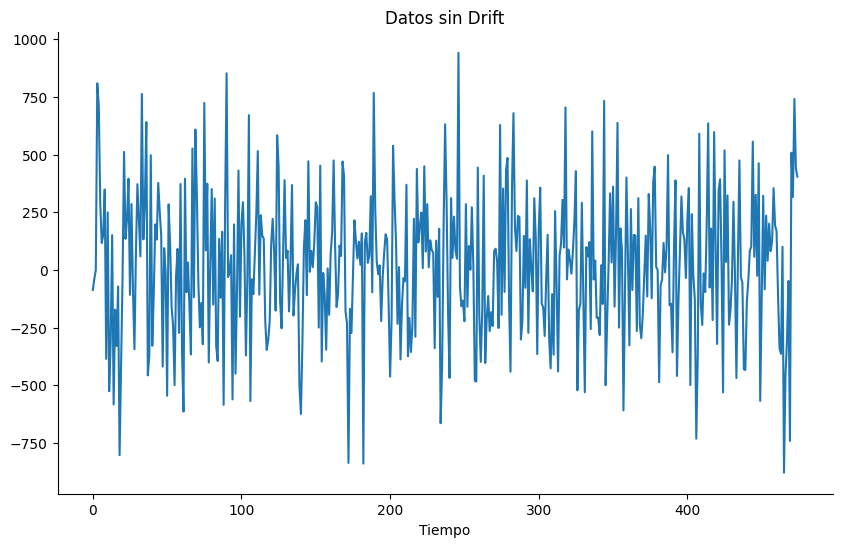

In [5]:
# Crear un gráfico de los datos
plt.figure(figsize=(10, 6))
plt.plot(anomalydetector.Xnormalized)
plt.xlabel('Tiempo')
plt.title('Datos sin Drift')

# Obtener los ejes actuales
ax = plt.gca()

# Ocultar las espinas (bordes) del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrar el gráfico
plt.show()

Detección de anomalías

In [6]:
n_init = round(len(datos) * 0.1) # 10% para entrenamiento
data_init = datos[:n_init]

# Creamos la clase para detectar anomalías
anomalydetector = DSPOT(data_init, p=0.98, q=10e-4, d=12)

# Iniciamos (POT)
anomalydetector.init()

# Detectar anomalias nuevas observaciones
excs = 0
x = [] 
for i in range(n_init, len(datos)-n_init):
    try:
        new_value = datos[i]
        anomalia = anomalydetector.update(new_value)

        if anomalia:
            x.append(i)

    except Exception as e:
        excs += 1

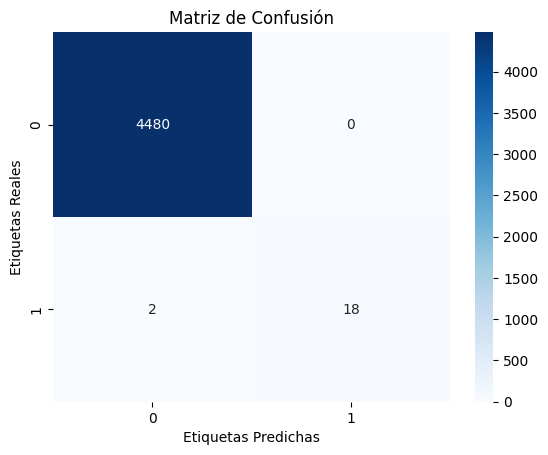

Accuracy: 1.00
Precision: 1.00
Recall: 0.90
F1 Score: 0.95


In [7]:
y_true = [1 if i in idx else 0 for i in range(500, 5000)]
y_pred = [1 if i in x else 0 for i in range(500, 5000)]

# Matriz de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

# Calcular métricas adicionales
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Visualizar la matriz de confusión con seaborn
labels = np.unique(np.concatenate((y_true, y_pred)))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()

# Imprimir métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

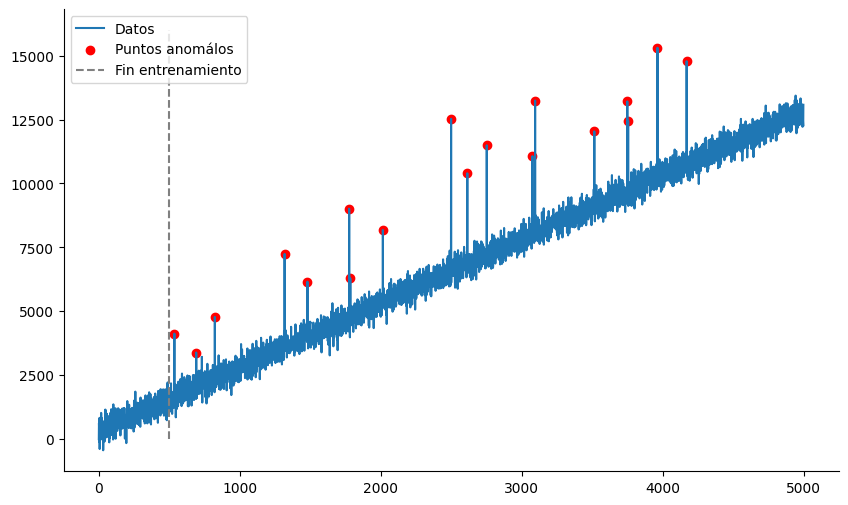

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(datos, label = 'Datos')
plt.scatter(x=x, y=anomalydetector.A, marker='o', color='red', label='Puntos anomálos')
plt.vlines(x=500, ymin=0, ymax=16000, label='Fin entrenamiento', color='gray', linestyle='dashed')

# Obtener los ejes actuales
ax = plt.gca()

# Ocultar las espinas (bordes) del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()